### Imported Libraries

In [9]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings("ignore", category=RuntimeWarning, message="invalid value encountered in cast")
warnings.filterwarnings("ignore", category=UserWarning, module="scipy.optimize.linesearch")
warnings.filterwarnings('ignore')


In [93]:
# Import the necessary libraries
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Import Classification Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error , confusion_matrix , classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split ,GridSearchCV

# Import Feature Engineering Techniques
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest , chi2, mutual_info_regression

# Import Classification Models
from sklearn.linear_model import  Lasso , Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.neighbors import KNeighborsClassifier

# Import the matplotlib and seaborn libraries for plotting
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib notebook
import seaborn as sns
sns.set()
import plotly
import plotly.express as px

from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [11]:
dataset = pd.read_csv('FE_data.csv')
df = dataset.copy()
df.head(5)

,status,founded_at,investment_rounds,funding_rounds,funding_total_usd,milestones,relationships,ROI,active_days,category_code_biotech,category_code_ecommerce,category_code_enterprise,category_code_games_video,category_code_hardware,category_code_health,category_code_mobile,category_code_other,category_code_software,category_code_web,country_code_CAN,country_code_DEU,country_code_ESP,country_code_FRA,country_code_GBR,country_code_IND,country_code_IRL,country_code_ISR,country_code_USA,country_code_other,status_class,funding_usd_for_1_round,milestone_diff,funding_year_diff,Age_group_2500-4000,Age_group_4000-5500,Age_group_5500-7000,Age_group_7000-10000
0,1,2003,1.0,1.0,250000.0,1.0,2.000000,6.500497,6570.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,250000.0,0.0,0.0,0,0,1,0
1,1,2010,1.0,1.0,100000.0,1.0,2.852067,6.500497,4015.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,100000.0,0.0,0.0,0,1,0,0
2,1,2004,1.0,1.0,1500000.0,1.0,8.000000,6.500497,6205.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1500000.0,0.0,0.0,0,0,1,0
3,1,2011,1.0,1.0,40000.0,1.0,5.000000,6.500497,3650.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,40000.0,0.0,0.0,1,0,0,0
4,1,2007,1.0,1.0,350000.0,1.0,2.000000,6.500497,5110.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,350000.0,0.0,0.0,0,1,0,0


In [12]:
df.shape

(8451, 37)

In [13]:
df.duplicated().sum()

369

In [14]:
df = df.drop_duplicates()
df.duplicated().sum()

0

### Train-Test Split

In [15]:
inputs = df.drop(['status','status_class'], axis=1) 
target = df['status']

##### MinMax Normalization

In [16]:
X_train, X_test, y_train, y_test = train_test_split(inputs, target, stratify = target ,random_state=365)

In [17]:
scalling_columns = ["relationships", "active_days", "milestone_diff", "funding_year_diff", "funding_usd_for_1_round"]
MMS = MinMaxScaler()
# applying fit transform on train data
X_train[scalling_columns] = MMS.fit_transform(X_train[scalling_columns])
# transforming on test data
X_test[scalling_columns] = MMS.transform(X_test[scalling_columns])

#### Select Best Features 

##### We are going to Test both datasets - the whole dataset and the best 20 features selected

In [18]:
# Perform feature selection on the training data
no_of_features = 5
selector = SelectKBest(mutual_info_classif, k=no_of_features)
X_train_5 = selector.fit_transform(X_train, y_train)


In [19]:
X_test_5 = selector.transform(X_test)

In [20]:
best_feature_no = selector.get_support(indices=True)
best_feature_no

array([ 0,  3,  6,  7, 31], dtype=int64)

In [21]:
selected_feature = list()
for i in best_feature_no:
    col_name = X_train.columns[i]
    selected_feature.append(col_name)

selected_feature

['founded_at',
 'funding_total_usd',
 'ROI',
 'active_days',
 'Age_group_2500-4000']

In [22]:
X_train_5 = X_train.iloc[:,best_feature_no]
X_test_5 = X_test.iloc[:,best_feature_no]

In [23]:
X_train_5.reset_index(drop=True, inplace=True)
X_test_5.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

#  Modeling

#### Train Model on the 5 best features

In [24]:
target_names = ['Not Closed' , 'Closed']

## Regularised Logistic Regression

In [25]:
prob_train = pd.DataFrame(columns=['Operating_Prob'], index=range(len(y_train)))
prob_test = pd.DataFrame(columns=['Operating_Prob'], index=range(len(y_test)))

In [26]:
def train_and_evaluate_LR_model(X_train, X_test, y_train, y_test):
    # Define the models and their respective parameter grids for hyperparameter tuning
    global prob_train
    global prob_test
    models = {
        'Regularized Logistic Regression': (LogisticRegression(),
                                                    {'penalty':['l1','l2'], 'C': [0.1, 1, 10] , 
                                                     'max_iter':[50,100,200,300] , 
                                                     'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                                    'newton-cholesky', 'sag', 'saga']}),
    }
    for model_name, (model, param_grid) in models.items():
        print(f"Training and evaluating {model_name}")

        # Hyperparameter tuning using GridSearchCV
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
        grid_search.fit(X_train, y_train)  # Use the scaled features

        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
       
        
        #Evaluation on training data
        y_train_pred = best_model.predict(X_train)
        train_accuracy = accuracy_score(y_train, y_train_pred)
        prob_of_X_train = best_model.predict_proba(X_train) # probability of training set
        prob_train["Operating_Prob"] = prob_of_X_train[:,1]
        prob_train["y_train_pred"] = y_train_pred
        
        # Evaluation on testing data
        y_test_pred = best_model.predict(X_test)  # Predict using scaled features
        prob_of_X_test = best_model.predict_proba(X_test) # probability of testing set
        prob_test["Operating_Prob"] = prob_of_X_test[:,1]
        
        test_mae = mean_absolute_error(y_test, y_test_pred)
        test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
        test_classification_report = classification_report(y_test, y_test_pred,  target_names= target_names )
        test_confusion_mat = confusion_matrix(y_test, y_test_pred)
        
        test_accuracy = accuracy_score(y_test, y_test_pred)
        test_precision = precision_score(y_test, y_test_pred)
        test_recall = recall_score(y_test, y_test_pred)
        tn, fp, fn, tp = test_confusion_mat.ravel()
        specificity = tn / float(tn + fp)
        false_positive = fp/ float(tn+fp)

        print(f"--- {model_name} ---")
        print("Training Data:\n")
        print("Training_Accuracy :",round(train_accuracy,2))
        print("\nTesting Data:")
        print(f"test_accuracy: {test_accuracy}")
        print(f"test_precision: {test_precision}")
        print(f"test_recall/sensitivity: {test_recall}")
        print(f"test_specificity: {specificity}")
        print(f"false_positive_rate: {false_positive}")
        print(f"\nMean Absolute Error: {test_mae}")
        print(f"Root Mean Squared Error: {test_rmse}")
        print(test_classification_report)
        
        print("Confusion Matrix:")
        # Plot Confusion Matrix
        sns.heatmap(test_confusion_mat,annot=True, fmt='d', annot_kws={'fontsize': 20})
        plt.title({model_name})
        plt.show()
        
        print(f"Best Model:{best_model}")
        print(f"Best Parameters: {best_params}")        
        

        print("-------------------------------\n")

Training and evaluating Regularized Logistic Regression
--- Regularized Logistic Regression ---
Training Data:

Training_Accuracy : 0.95

Testing Data:
test_accuracy: 0.946066303809995
test_precision: 0.9417735042735043
test_recall/sensitivity: 1.0
test_specificity: 0.5775193798449613
false_positive_rate: 0.42248062015503873

Mean Absolute Error: 0.053933696190004946
Root Mean Squared Error: 0.23223629386899228
              precision    recall  f1-score   support

  Not Closed       1.00      0.58      0.73       258
      Closed       0.94      1.00      0.97      1763

    accuracy                           0.95      2021
   macro avg       0.97      0.79      0.85      2021
weighted avg       0.95      0.95      0.94      2021

Confusion Matrix:


<IPython.core.display.Javascript object>


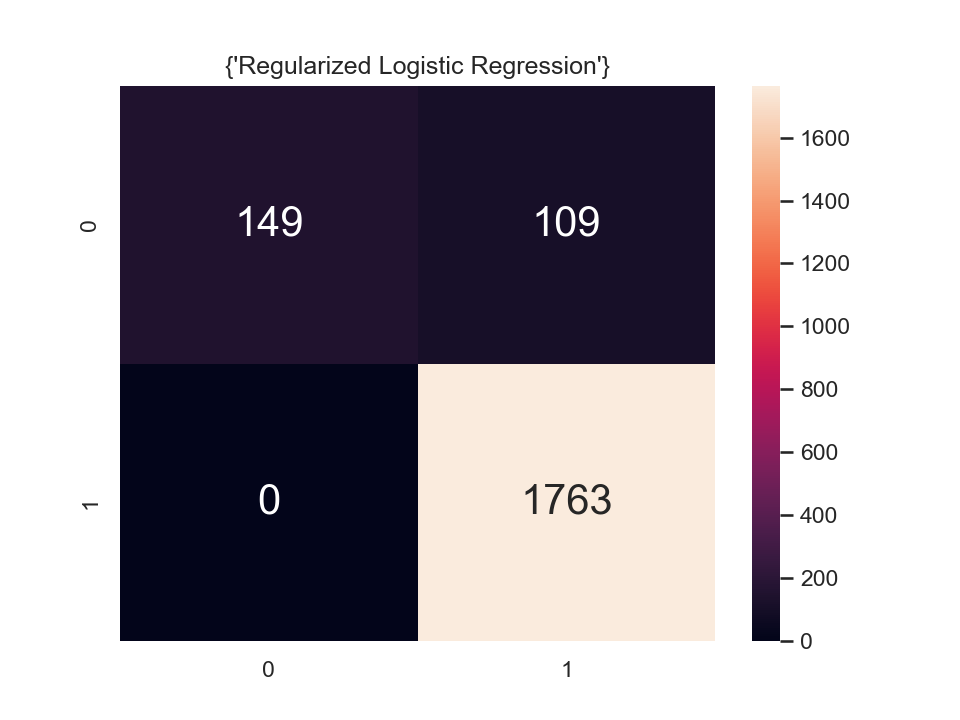

Best Model:LogisticRegression(C=1, max_iter=300, solver='newton-cg')
Best Parameters: {'C': 1, 'max_iter': 300, 'penalty': 'l2', 'solver': 'newton-cg'}
-------------------------------



In [27]:
train_and_evaluate_LR_model(X_train_5, X_test_5, y_train, y_test)

In [29]:
prob_train["y_train"] = y_train
prob_train["Operating_Prob"] = round(prob_train["Operating_Prob"], 2 )
prob_train

,Operating_Prob,y_train_pred,y_train
0,0.98,1,1
1,0.76,1,1
2,0.98,1,1
3,0.92,1,1
4,0.98,1,1
5,0.17,0,0
6,0.97,1,1
7,0.92,1,1
8,0.85,1,1
9,0.82,1,1


### ROC curve

In [30]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                             drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

<IPython.core.display.Javascript object>


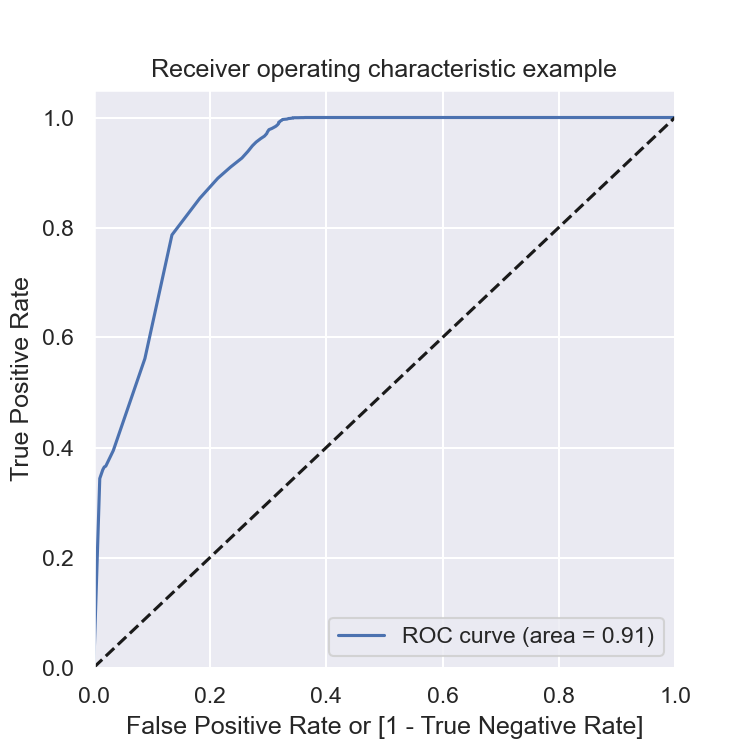

In [31]:
draw_roc(prob_train["y_train"], prob_train["Operating_Prob"])

Predicting model based on different thresholds

In [32]:
numbers = [0.0,0.1,0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
for i in numbers:
    prob_train[i]= prob_train.Operating_Prob.map(lambda x: 1 if x > i else 0)
prob_train.head()

,Operating_Prob,y_train_pred,y_train,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1
0,0.98,1,1,1,1,1,1,1,1,1,1,1,1,0
1,0.76,1,1,1,1,1,1,1,1,1,1,0,0,0
2,0.98,1,1,1,1,1,1,1,1,1,1,1,1,0
3,0.92,1,1,1,1,1,1,1,1,1,1,1,1,0
4,0.98,1,1,1,1,1,1,1,1,1,1,1,1,0


In [33]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])


num = [0.0,0.1,0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
for i in num:
    cm1 = metrics.confusion_matrix(prob_train.y_train, prob_train[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.873453  1.000000  0.007762
0.1   0.1  0.885992  1.000000  0.106080
0.2   0.2  0.908101  1.000000  0.279431
0.3   0.3  0.937634  1.000000  0.510996
0.4   0.4  0.948523  1.000000  0.596378
0.5   0.5  0.950998  1.000000  0.615783
0.6   0.6  0.954298  0.999811  0.642950
0.7   0.7  0.954298  0.994894  0.676585
0.8   0.8  0.938954  0.973714  0.701164
0.9   0.9  0.848540  0.853064  0.817594
1.0   1.0  0.127537  0.000000  1.000000


<IPython.core.display.Javascript object>


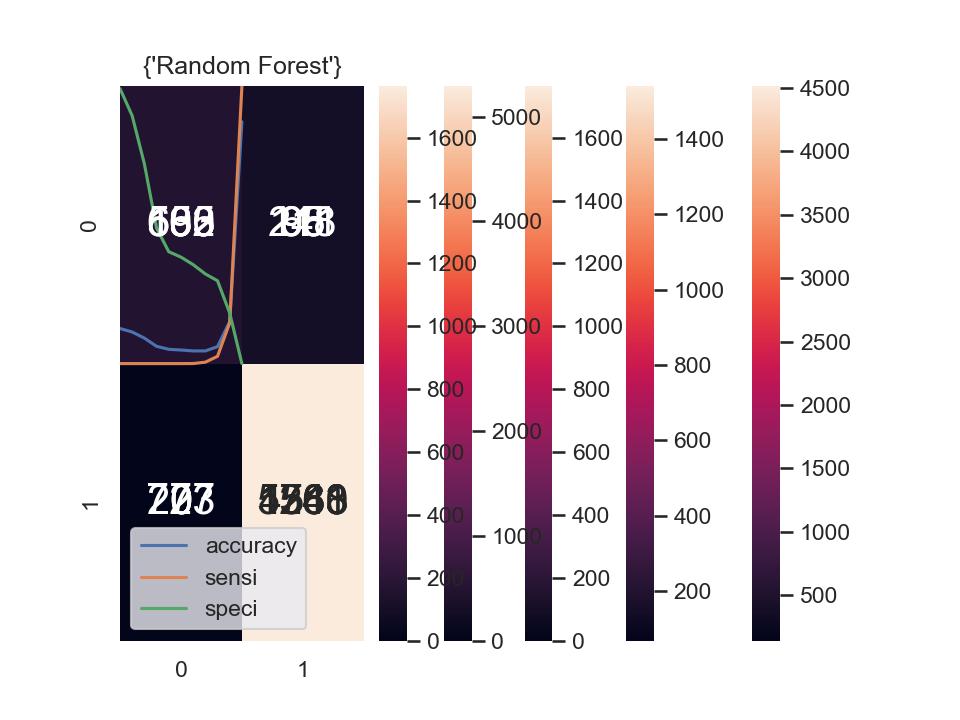

In [34]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

at 0.9 probability accuracy, sensitivity and specificity are overlaping<br>
consider best threshold as 0.9

In [35]:
prob_train['final_predicted'] = prob_train.Operating_Prob.map( lambda x: 1 if x > 0.9 else 0)
prob_train.head()

,Operating_Prob,y_train_pred,y_train,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,final_predicted
0,0.98,1,1,1,1,1,1,1,1,1,1,1,1,0,1
1,0.76,1,1,1,1,1,1,1,1,1,1,0,0,0,0
2,0.98,1,1,1,1,1,1,1,1,1,1,1,1,0,1
3,0.92,1,1,1,1,1,1,1,1,1,1,1,1,0,1
4,0.98,1,1,1,1,1,1,1,1,1,1,1,1,0,1


Constructing function for model accuracy

In [36]:
def model_accuracy(part, actual, predicted):
    
    accuracy = accuracy_score(actual, predicted)
    confusion_mat = confusion_matrix(actual, predicted)
    precision = precision_score(actual, predicted)
    recall = recall_score(actual, predicted)
    tn, fp, fn, tp = confusion_mat.ravel()
    specificity = tn / float(tn + fp)
    false_positive = fp/ float(tn+fp)
    
    mae = mean_absolute_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    class_report = classification_report(actual, predicted,  target_names= target_names )
    
    print(f"{part}_accuracy: {round(accuracy,2)}")
    print(f"{part}_precision: {round(precision,2)}")
    print(f"{part}_recall/sensitivity: {round(recall,2)}")
    print(f"{part}_specificity: {round(specificity,2)}")
    print(f"false_positive_rate: {round(false_positive,2)}")
    print(f"\nMean Absolute Error: {round(mae,2)}")
    print(f"Root Mean Squared Error: {round(rmse,2)}")
    print(class_report)
    
    print(f"Confusion Matrix of {part} data")
    # Plot Confusion Matrix
    sns.heatmap(confusion_mat,annot=True, fmt='d', annot_kws={'fontsize': 20})
    plt.show()  
    

In [37]:
model_accuracy("train",prob_train["y_train"], prob_train['final_predicted'])

train_accuracy: 0.85
train_precision: 0.97
train_recall/sensitivity: 0.85
train_specificity: 0.82
false_positive_rate: 0.18

Mean Absolute Error: 0.15
Root Mean Squared Error: 0.39
              precision    recall  f1-score   support

  Not Closed       0.45      0.82      0.58       773
      Closed       0.97      0.85      0.91      5288

    accuracy                           0.85      6061
   macro avg       0.71      0.84      0.74      6061
weighted avg       0.90      0.85      0.87      6061

Confusion Matrix of train data


#### Making predictions on the test set

In [38]:
prob_test["y_test"] = y_test
prob_test['final_predicted'] = prob_test.Operating_Prob.map( lambda x: 1 if x > 0.9 else 0)
prob_test.head()

,Operating_Prob,y_test,final_predicted
0,0.832651,1,0
1,0.979646,1,1
2,0.923539,1,1
3,0.928696,1,1
4,0.981574,1,1


In [39]:
model_accuracy("test",prob_test["y_test"], prob_test['final_predicted'])

test_accuracy: 0.86
test_precision: 0.96
test_recall/sensitivity: 0.87
test_specificity: 0.74
false_positive_rate: 0.26

Mean Absolute Error: 0.14
Root Mean Squared Error: 0.38
              precision    recall  f1-score   support

  Not Closed       0.46      0.74      0.57       258
      Closed       0.96      0.87      0.91      1763

    accuracy                           0.86      2021
   macro avg       0.71      0.80      0.74      2021
weighted avg       0.89      0.86      0.87      2021

Confusion Matrix of test data


The model provides higher levels of sensitivity, specificity, accuracy, and precision.<br>
Furthermore, the model's low false-positive rate is a positive sign for the model.

## Random forest

In [40]:
RF_Train_results = pd.DataFrame(columns=['y_pred'], index=range(len(y_train)))
RF_Test_results = pd.DataFrame(columns=['y_pred'], index=range(len(y_test)))

In [41]:
def train_and_evaluate_RF_model(X_train, X_test, y_train, y_test):
    # Define the models and their respective parameter grids for hyperparameter tuning
    global RF_Train_results
    global RF_Test_results
    models = {
        'Random Forest': (RandomForestClassifier(), {'n_estimators': [200],
                                                       'criterion':['gini', 'entropy',],
                                                       'max_features': ['auto', 'log2'],
                                                        'max_depth': [None, 5, 10],
                                                          'min_samples_split' :[10,15],
                                                        'min_samples_leaf': [5,10]
                                                    }),
            }
    for model_name, (model, param_grid) in models.items():
        print(f"Training and evaluating {model_name}")

        # Hyperparameter tuning using GridSearchCV
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
        grid_search.fit(X_train, y_train)  # Use the scaled features

        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
        
        #Evaluation on training data
        y_train_pred = best_model.predict(X_train)
        RF_Train_results["y_pred"] = y_train_pred

        # Evaluation on testing data
        y_test_pred = best_model.predict(X_test)  # Predict using scaled features
        RF_Test_results["y_pred"] = y_test_pred
        test_mae = mean_absolute_error(y_test, y_test_pred)
        test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
        test_classification_report = classification_report(y_test, y_test_pred,  target_names= target_names )
        test_confusion_mat = confusion_matrix(y_test, y_test_pred)
        
        test_accuracy = accuracy_score(y_test, y_test_pred)
        test_precision = precision_score(y_test, y_test_pred)
        test_recall = recall_score(y_test, y_test_pred)
        tn, fp, fn, tp = test_confusion_mat.ravel()
        specificity = tn / (tn + fp)


        print(f"--- {model_name} ---")
        print("Training Data:\n")
        print("Training_Accuracy :",round(test_accuracy,2))
        print("\nTesting Data:")
        print(f"test_accuracy {test_accuracy}")
        print(f"test_precision {test_precision}")
        print(f"test_recall {test_recall}")
        print(f"test_specificity {specificity}")
        print(f"\nMean Absolute Error: {test_mae}")
        print(f"Root Mean Squared Error: {test_rmse}")
        print(test_classification_report)
        
        print("Confusion Matrix:")
        # Plot Confusion Matrix
        sns.heatmap(test_confusion_mat,annot=True, fmt='d', annot_kws={'fontsize': 20})
        plt.title({model_name})
        plt.show()
        print(f"Best Model:{best_model}")
        print(f"Best Parameters: {best_params}") 

        print("-------------------------------\n")

In [42]:
train_and_evaluate_RF_model(X_train_5, X_test_5, y_train, y_test)

Training and evaluating Random Forest
--- Random Forest ---
Training Data:

Training_Accuracy : 0.95

Testing Data:
test_accuracy 0.9529935675408214
test_precision 0.9488697524219591
test_recall 1.0
test_specificity 0.6317829457364341

Mean Absolute Error: 0.047006432459178626
Root Mean Squared Error: 0.2168096687400694
              precision    recall  f1-score   support

  Not Closed       1.00      0.63      0.77       258
      Closed       0.95      1.00      0.97      1763

    accuracy                           0.95      2021
   macro avg       0.97      0.82      0.87      2021
weighted avg       0.96      0.95      0.95      2021

Confusion Matrix:
Best Model:RandomForestClassifier(max_features='log2', min_samples_leaf=5,
                       min_samples_split=15, n_estimators=200)
Best Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 15, 'n_estimators': 200}
-------------------------------



In [43]:
RF_Train_results["y_train"] = y_train
RF_Test_results["y_test"] = y_test

In [44]:
model_accuracy("train",RF_Train_results["y_train"], RF_Train_results['y_pred'])

train_accuracy: 0.96
train_precision: 0.96
train_recall/sensitivity: 1.0
train_specificity: 0.72
false_positive_rate: 0.28

Mean Absolute Error: 0.04
Root Mean Squared Error: 0.19
              precision    recall  f1-score   support

  Not Closed       1.00      0.72      0.84       773
      Closed       0.96      1.00      0.98      5288

    accuracy                           0.96      6061
   macro avg       0.98      0.86      0.91      6061
weighted avg       0.97      0.96      0.96      6061

Confusion Matrix of train data


In [45]:
model_accuracy("test",RF_Test_results["y_test"], RF_Test_results['y_pred'])

test_accuracy: 0.95
test_precision: 0.95
test_recall/sensitivity: 1.0
test_specificity: 0.63
false_positive_rate: 0.37

Mean Absolute Error: 0.05
Root Mean Squared Error: 0.22
              precision    recall  f1-score   support

  Not Closed       1.00      0.63      0.77       258
      Closed       0.95      1.00      0.97      1763

    accuracy                           0.95      2021
   macro avg       0.97      0.82      0.87      2021
weighted avg       0.96      0.95      0.95      2021

Confusion Matrix of test data


The model provides higher levels of sensitivity, accuracy, and precision.<br>
Furthermore, the model's low false-positive rate is a positive sign for the model.

## Multiclass classification

In [121]:
target = df['status_class']


In [122]:
X_train, X_test, y_train, y_test = train_test_split(inputs, target, stratify = target ,random_state=365)

In [123]:
scaling_columns = ["relationships", "active_days", "milestone_diff", "funding_year_diff", "funding_usd_for_1_round"]
MMS = MinMaxScaler()
X_train[scaling_columns] = MMS.fit_transform(X_train[scaling_columns])
X_test[scaling_columns] = MMS.transform(X_test[scaling_columns])

In [124]:
scaling_columns = ["relationships", "active_days", "milestone_diff", "funding_year_diff", "funding_usd_for_1_round"]
MMS = MinMaxScaler()

In [125]:
X_train[scaling_columns] = MMS.fit_transform(X_train[scaling_columns])
X_test[scaling_columns] = MMS.transform(X_test[scaling_columns])

In [126]:
X_train_5 = X_train.iloc[:,best_feature_no]
X_test_5 = X_test.iloc[:,best_feature_no]

In [127]:
KNN_Train_results = pd.DataFrame(columns=['y_pred'], index=range(len(y_train)))
KNN_Test_results = pd.DataFrame(columns=['y_pred'], index=range(len(y_test)))

In [128]:
target_names = ['operating', 'ipo', 'closed', 'acquired']

In [129]:
def train_and_evaluate_knn_model(X_train, X_test, y_train, y_test):
    global KNN_Train_results
    global KNN_Test_results
    models = {
        'k-Nearest Neighbor': (KNeighborsClassifier(), {'n_neighbors': [5, 7],
                                                       'weights':['uniform', 'distance'],
                                                       'algorithm': ['auto'],
                                                       'leaf_size': [20, 30],
                                                       'p': [1, 2],
                                                       'metric': ['minkowski']
                                                    }),
            }
    for model_name, (model, param_grid) in models.items():
        print(f"Training and evaluating {model_name}")

        # Hyperparameter tuning using GridSearchCV
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
        grid_search.fit(X_train, y_train)

        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
        
        #Evaluation on training data
        y_train_pred = best_model.predict(X_train)
        KNN_Train_results["y_pred"] = y_train_pred

        # Evaluation on testing data
        y_test_pred = best_model.predict(X_test)
        KNN_Test_results["y_pred"] = y_test_pred
        test_mae = mean_absolute_error(y_test, y_test_pred)
        test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
        test_classification_report = classification_report(y_test, y_test_pred,  target_names= target_names )
        test_confusion_mat = confusion_matrix(y_test, y_test_pred)
        
        test_accuracy = accuracy_score(y_test, y_test_pred)
        test_precision = precision_score(y_test, y_test_pred, average='micro')
        test_recall = recall_score(y_test, y_test_pred, average='micro')
        # print(test_confusion_mat.ravel())
        # tn, fp, fn, tp = test_confusion_mat.ravel()
        # specificity = tn / (tn + fp)
        
        print(f"--- {model_name} ---")
        print("Training Data:\n")
        print("Training_Accuracy :",round(test_accuracy,2))
        print("\nTesting Data:")
        print(f"test_accuracy {test_accuracy}")
        print(f"test_precision {test_precision}")
        print(f"test_recall {test_recall}")
        # print(f"test_specificity {specificity}")
        print(f"\nMean Absolute Error: {test_mae}")
        print(f"Root Mean Squared Error: {test_rmse}")
        print(test_classification_report)
        
        print("Confusion Matrix:")
        sns.heatmap(test_confusion_mat,annot=True, fmt='d', annot_kws={'fontsize': 20})
        plt.title({model_name})
        plt.show()
        print(f"Best Model:{best_model}")
        print(f"Best Parameters: {best_params}") 

        print("-------------------------------\n")

Training and evaluating k-Nearest Neighbor
--- k-Nearest Neighbor ---
Training Data:

Training_Accuracy : 0.88

Testing Data:
test_accuracy 0.8767936665017318
test_precision 0.8767936665017318
test_recall 0.8767936665017318

Mean Absolute Error: 0.29490351311232066
Root Mean Squared Error: 0.8597895096996759
              precision    recall  f1-score   support

   operating       0.88      1.00      0.93      1759
         ipo       0.00      0.00      0.00         4
      closed       0.83      0.13      0.22       159
    acquired       0.00      0.00      0.00        99

    accuracy                           0.88      2021
   macro avg       0.43      0.28      0.29      2021
weighted avg       0.83      0.88      0.83      2021

Confusion Matrix:


<IPython.core.display.Javascript object>


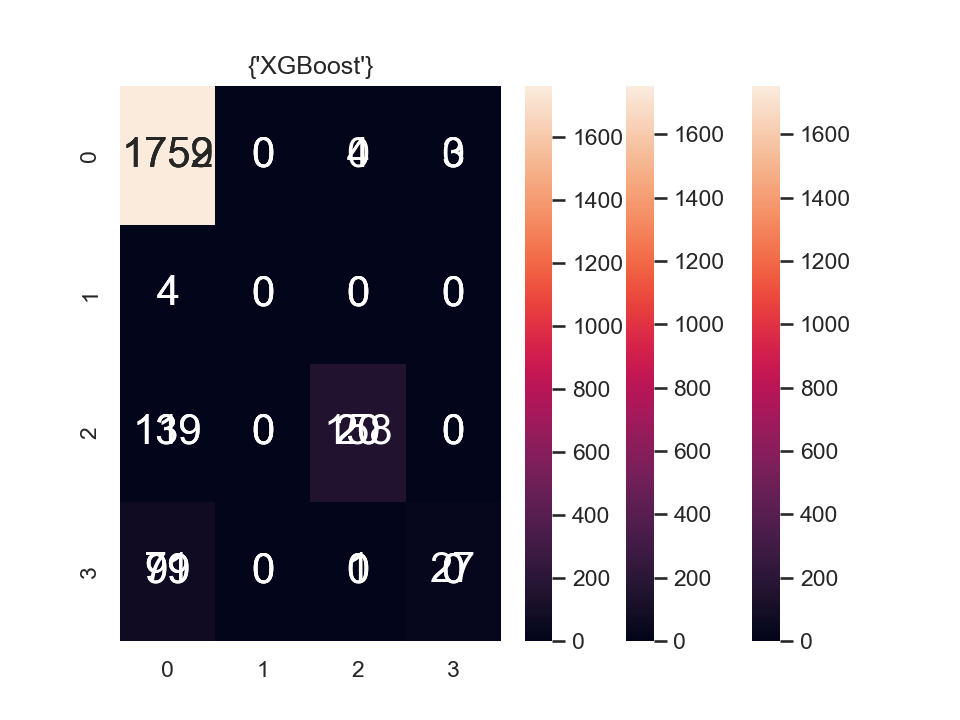

Best Model:KNeighborsClassifier(leaf_size=20, n_neighbors=7, p=1)
Best Parameters: {'algorithm': 'auto', 'leaf_size': 20, 'metric': 'minkowski', 'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
-------------------------------



In [130]:
train_and_evaluate_knn_model(X_train_5, X_test_5, y_train, y_test)

In [147]:
def train_and_evaluate_xgb_model(X_train, X_test, y_train, y_test):

    models = { 
            'XGBoost': (XGBClassifier(),{'n_estimators': [100, 200, 300],
                                         'max_depth': [3, 5, 7], 'learning_rate': [0.1, 0.01, 0.001]})
             }
    for model_name, (model, param_grid) in models.items():
        print(f"Training and evaluating {model_name}")

        # Hyperparameter tuning using GridSearchCV
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
        grid_search.fit(X_train, y_train)  # Use the scaled features
        
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
        
        #Evaluation on training data
        y_train_pred = best_model.predict(X_train)
        KNN_Train_results["y_pred"] = y_train_pred

        # Evaluation on testing data
        y_test_pred = best_model.predict(X_test)
        KNN_Test_results["y_pred"] = y_test_pred
        test_mae = mean_absolute_error(y_test, y_test_pred)
        test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
        test_classification_report = classification_report(y_test, y_test_pred,  target_names= target_names )
        test_confusion_mat = confusion_matrix(y_test, y_test_pred)
        
        test_accuracy = accuracy_score(y_test, y_test_pred)
        test_precision = precision_score(y_test, y_test_pred, average='micro')
        test_recall = recall_score(y_test, y_test_pred, average='micro')
        # print(test_confusion_mat.ravel())
        # tn, fp, fn, tp = test_confusion_mat.ravel()
        # specificity = tn / (tn + fp)
        
        print(f"--- {model_name} ---")
        print("Training Data:\n")
        print("Training_Accuracy :",round(test_accuracy,2))
        print("\nTesting Data:")
        print(f"test_accuracy {test_accuracy}")
        print(f"test_precision {test_precision}")
        print(f"test_recall {test_recall}")
        # print(f"test_specificity {specificity}")
        print(f"\nMean Absolute Error: {test_mae}")
        print(f"Root Mean Squared Error: {test_rmse}")
        print(test_classification_report)
        
        print("Confusion Matrix:")
        sns.heatmap(test_confusion_mat,annot=True, fmt='d', annot_kws={'fontsize': 20})
        plt.title({model_name})
        plt.show()
        print(f"Best Model:{best_model}")
        print(f"Best Parameters: {best_params}") 

        print("-------------------------------\n")


In [148]:
train_and_evaluate_xgb_model(X_train_5, X_test_5, y_train, y_test)

Training and evaluating XGBoost
--- XGBoost ---
Training Data:

Training_Accuracy : 0.96

Testing Data:
test_accuracy 0.9619000494804553
test_precision 0.9619000494804553
test_recall 0.9619000494804553

Mean Absolute Error: 0.10885700148441366
Root Mean Squared Error: 0.5662449556745017
              precision    recall  f1-score   support

   operating       0.96      1.00      0.98      1759
         ipo       0.00      0.00      0.00         4
      closed       0.99      0.99      0.99       159
    acquired       1.00      0.27      0.43        99

    accuracy                           0.96      2021
   macro avg       0.74      0.57      0.60      2021
weighted avg       0.96      0.96      0.95      2021

Confusion Matrix:
Best Model:XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_met